## The Adult Dataset (Binary Classification with Synthetic Data)
The adult dataset is a classic imbalanced classification task dataset. The final column specifies whether the person makes <= 50k a year, or more.

Here we see MWEM stretched - we are forced to carefully select our feature dependence (via the "splits" feature) to acheive a reasonable data synthesis.

We show that by either specifying a max_bin_count, or by dropping continuous columns, we can greatly speed up performance.

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from opendp.whitenoise.synthesizers.mwem import MWEMSynthesizer

In [5]:
adult = utils.preprocess_encode('datasets/adult.csv')

adult_cat_ord = utils.preprocess_encode('datasets/adult.csv')

cat_ord_columns = ['workclass',
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race',
                       'gender',
                       'native-country',
                       'income',
                       'education',
                       'age',
                       'education-num',
                       'hours-per-week']

for c in adult_cat_ord.columns.values:
    if not c in cat_ord_columns:
        adult_cat_ord = adult_cat_ord.drop([c], axis=1)
        
nf = adult.to_numpy()
nf_cat_ord = adult_cat_ord.to_numpy()

In [6]:
synth = MWEMSynthesizer(1000, 1.0, 5, 10, splits=[[0,1,2],[3,4,5],[6,7,8],[9,10],[11,12],[13,14]], max_bin_count=400)
synth.fit(nf)

synth_cat_ord = MWEMSynthesizer(1000, 1.0, 10, 10, split_factor=3)
synth_cat_ord.fit(nf_cat_ord)

Initializing iteration with columns [0, 1, 2]
Estimate duration till completion: 1.128 seconds (lower bound)
Initializing iteration with columns [3, 4, 5]
Estimate duration till completion: 0.239 seconds (lower bound)
Initializing iteration with columns [6, 7, 8]
Estimate duration till completion: 0.232 seconds (lower bound)
Initializing iteration with columns [9, 10]
Estimate duration till completion: 0.217 seconds (lower bound)
Initializing iteration with columns [11, 12]
Estimate duration till completion: 0.365 seconds (lower bound)
Initializing iteration with columns [13, 14]
Estimate duration till completion: 0.222 seconds (lower bound)
Initializing iteration with columns [0 1 2]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [3 4 5]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [6 7 8]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns

In [7]:
sample_size = len(nf)
synthetic = synth.sample(int(sample_size))
synthetic_cat_ord = synth_cat_ord.sample(int(sample_size))


Trained on Real Data
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7479
           1       0.73      0.32      0.44      2290

    accuracy                           0.81      9769
   macro avg       0.77      0.64      0.66      9769
weighted avg       0.80      0.81      0.78      9769

Accuracy real: 0.8119561879414474

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      4956
           1       0.49      0.58      0.53      4813

    accuracy                           0.50      9769
   macro avg       0.50      0.50      0.50      9769
weighted avg       0.50      0.50      0.50      9769

Accuracy synthetic: 0.5010748285392568

Random Guessing
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      4956
           1       0.49      0.50      0.49      4813

    accuracy                           0.49

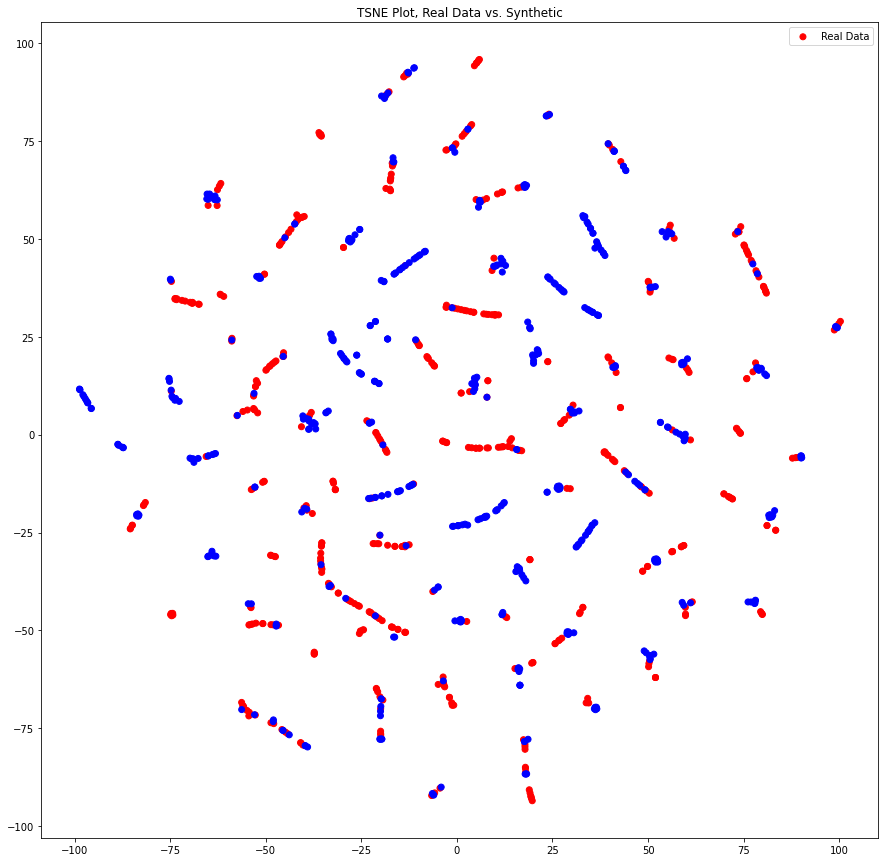

                age     workclass        fnlwgt     education  \
count  48842.000000  48842.000000  4.884200e+04  48842.000000   
mean      38.643585      3.870439  1.896641e+05     10.288420   
std       13.710510      1.464234  1.056040e+05      3.874492   
min       17.000000      0.000000  1.228500e+04      0.000000   
25%       28.000000      4.000000  1.175505e+05      9.000000   
50%       37.000000      4.000000  1.781445e+05     11.000000   
75%       48.000000      4.000000  2.376420e+05     12.000000   
max       90.000000      8.000000  1.490400e+06     15.000000   

       educational-num  marital-status    occupation  relationship  \
count     48842.000000    48842.000000  48842.000000  48842.000000   
mean         10.078089        2.618750      6.577700      1.443287   
std           2.570973        1.507703      4.230509      1.602151   
min           1.000000        0.000000      0.000000      0.000000   
25%           9.000000        2.000000      3.000000      0.0000

(RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=None,
                 solver='auto', tol=0.001))

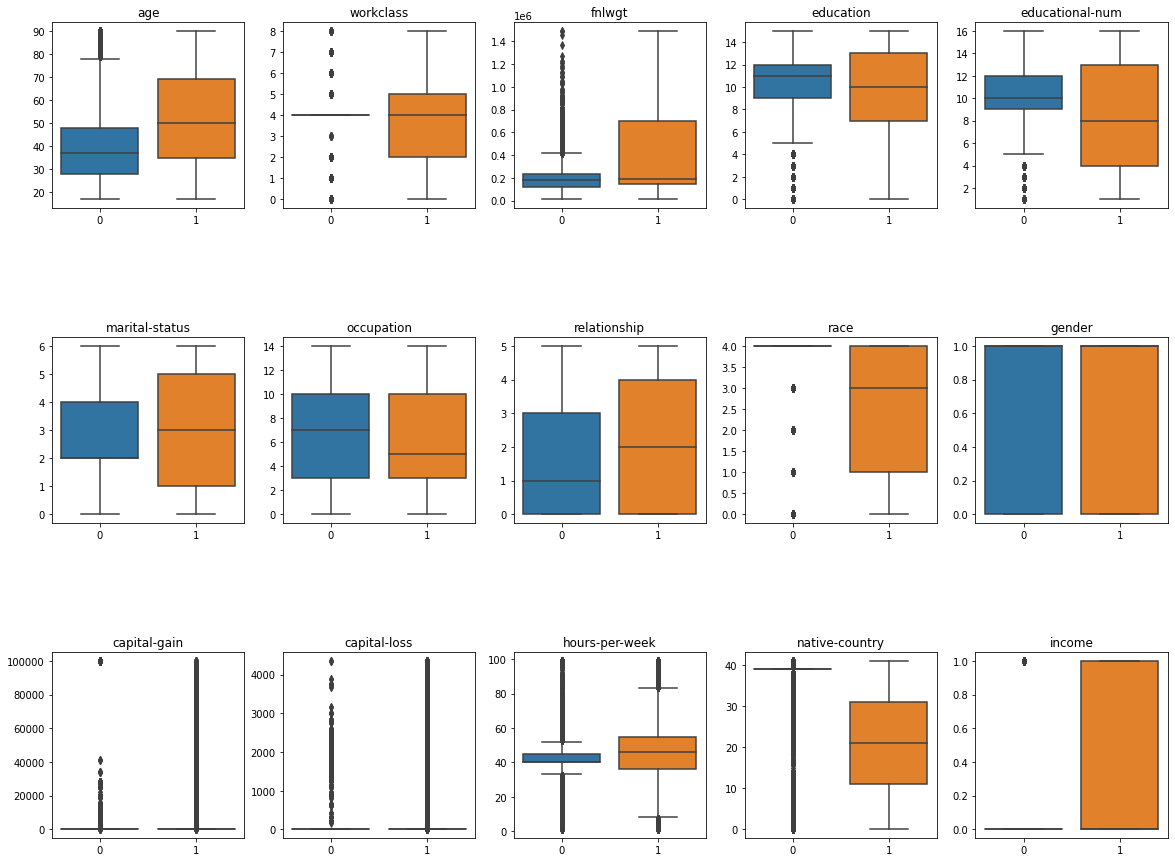

In [8]:
utils.test_real_vs_synthetic_data(adult, synthetic, RidgeClassifier, tsne=True, box=True, describe=True)


Trained on Real Data
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      7479
           1       0.39      0.80      0.52      2290

    accuracy                           0.66      9769
   macro avg       0.65      0.71      0.63      9769
weighted avg       0.79      0.66      0.68      9769

Accuracy real: 0.6585116183846863

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4915
           1       0.50      0.50      0.50      4854

    accuracy                           0.50      9769
   macro avg       0.50      0.50      0.50      9769
weighted avg       0.50      0.50      0.50      9769

Accuracy synthetic: 0.4990275360835295

Random Guessing
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      4915
           1       0.50      0.50      0.50      4854

    accuracy                           0.50

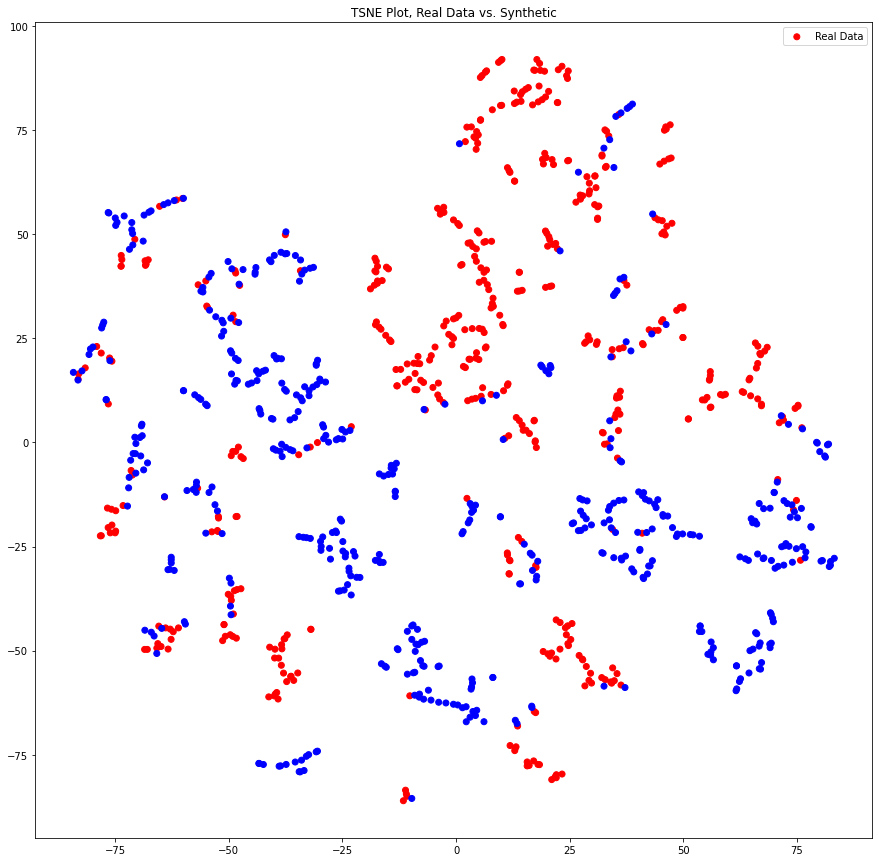

                age     workclass     education  marital-status    occupation  \
count  48842.000000  48842.000000  48842.000000    48842.000000  48842.000000   
mean      38.643585      3.870439     10.288420        2.618750      6.577700   
std       13.710510      1.464234      3.874492        1.507703      4.230509   
min       17.000000      0.000000      0.000000        0.000000      0.000000   
25%       28.000000      4.000000      9.000000        2.000000      3.000000   
50%       37.000000      4.000000     11.000000        2.000000      7.000000   
75%       48.000000      4.000000     12.000000        4.000000     10.000000   
max       90.000000      8.000000     15.000000        6.000000     14.000000   

       relationship          race        gender  hours-per-week  \
count  48842.000000  48842.000000  48842.000000    48842.000000   
mean       1.443287      3.668052      0.668482       40.422382   
std        1.602151      0.845986      0.470764       12.391444   
mi

(ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False),
 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False))

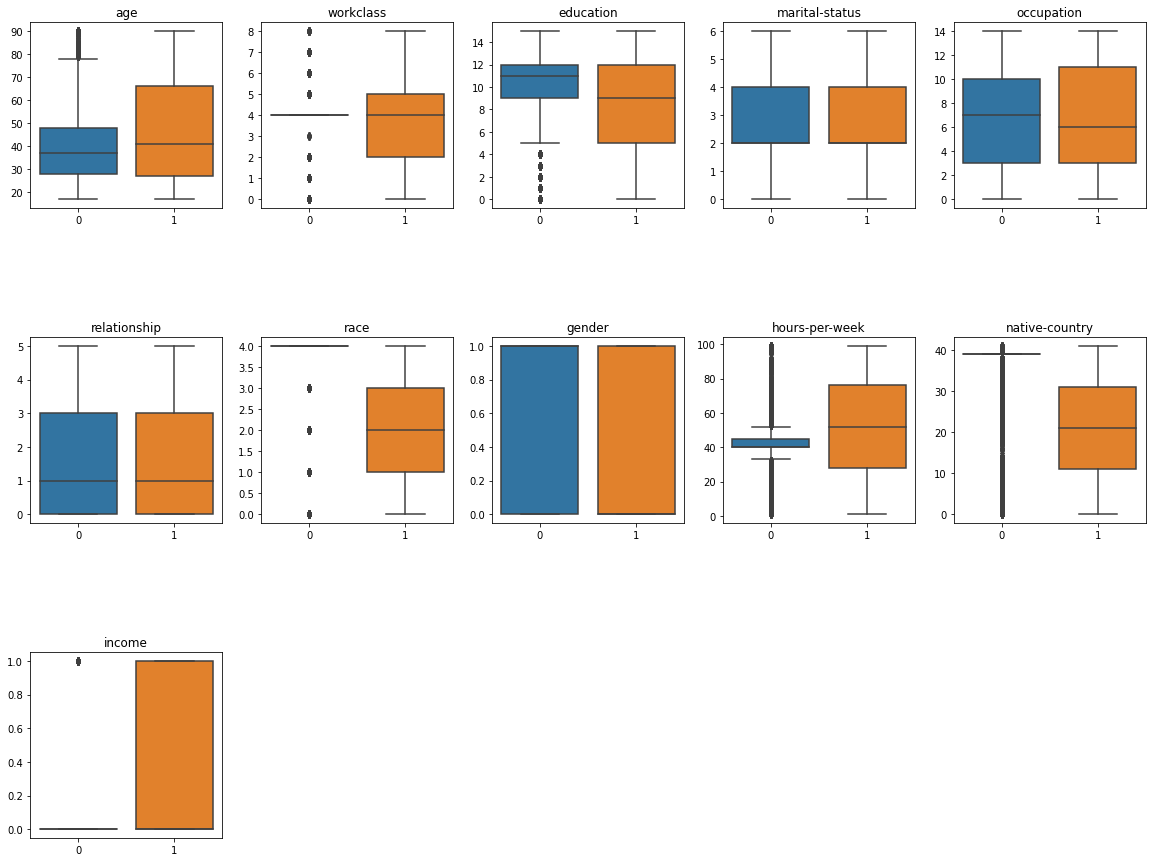

In [9]:
utils.test_real_vs_synthetic_data(adult_cat_ord, synthetic_cat_ord, ComplementNB, tsne=True, box=True, describe=True)